# The Magic of Disney

by Judith Terry

## Business Understanding

- Brief description
    - From 1937 to 2016, the Walt Disney Company produced 579 films that include a wealth of information on gross revenue generation compared to release date, mpaa rating and film genre. 

- Question 1
    - A MPAA Rating of PG has a greater gross revenue with inflation over other MPAA Ratings.
- Question 2
    - Highest Grossing Films are within the Comedy Genre
- Question 3
    - Disney Films Released before 01-01-1986 have a lower gross per film compared to those released during and after this date

## Data Understanding

### Data Sources
- Disney Movies 1937-2016 Gross Income
- https://www.kaggle.com/rashikrahmanpritom/disney-movies-19372016-total-gross?select=disney_movies_total_gross.csv

### Gather

In [67]:
import numpy as np
import pandas as pd

### File Locations

In [119]:
disney_data = pd.read_csv("/Users/Judy/Downloads/disney_movies_total_gross.csv")

print (disney_data)

### Function

In [130]:
Message = 'Disney Data Loaded Successfully!'

# print the string message
print(Message)

Disney Data Loaded Successfully!


### Assess

- Data.head()
    - Review First Rows in the Dataset to evaluate if data appears correctly

In [69]:
disney_data.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


- data.info()
    - Review the number of data fields and if there is any null data
        - Based on the data, there are null fields in genre and mpaa rating.
        - Due to the uniqueness of these ordinal data fields, they cannot be filled.
        - During evaluation of these columns these null fields will be excluded.

In [70]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


## Prepare Data

### Wrangle

- value_counts()
    - Returns unique values in descending order and excludes null values.
    - Important in determination of values present for the columns with null values (genre, mpaa rating) before coding.

In [71]:
disney_data['genre'].value_counts()

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Documentary             16
Musical                 16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

In [72]:
disney_data['mpaa_rating'].value_counts()

PG           187
PG-13        145
R            102
G             86
Not Rated      3
Name: mpaa_rating, dtype: int64

### Clean

- data.rename
    - Rename columns from dataset titles to column headings

In [73]:
new_name = {'movie_title' : 'Movie Title', "release_date" : 'Release Date', 'genre' : 'Genre', 'mpaa_rating' : 'MPAA Rating', 'total_gross' : 'Total Gross', 'inflation_adjusted_gross' : 'Inflation Adjusted Gross'}

disney_data.rename(columns= new_name, inplace=True)
disney_data.head()

,Movie Title,Release Date,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


## Question 1. A MPAA Rating of PG has a greater gross revenue with inflation over other MPAA Ratings.

### Analyze

- setup the dataframe

In [74]:
df = pd.read_csv("/Users/Judy/Downloads/disney_movies_total_gross.csv")
print(df)

                         movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0      184925485                5228953251

- Find the mean of the non-null dataframe values within the column mpaa_rating

In [101]:
grouped_df = df.groupby("mpaa_rating")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
pd.options.display.float_format = '{:20,.2f}'.format

print(mean_df)

  mpaa_rating          total_gross  inflation_adjusted_gross
0           G        92,090,612.71            291,260,995.01
1   Not Rated        50,462,589.67            299,873,412.67
2          PG        73,625,210.54            101,541,433.59
3       PG-13        81,180,741.99            102,948,584.00
4           R        29,365,358.78             55,305,805.55


## Question 2. Highest Grossing Films are within the Comedy Genre
### Analyze

- setup the dataframe

In [23]:
df = pd.read_csv("/Users/Judy/Downloads/disney_movies.csv")
print(df)

                         movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0      184925485                5228953251

- Find the mean of the non-null dataframe values within the column genre

In [80]:
grouped_df = df.groupby("genre")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
pd.options.display.float_format = '{:20,.2f}'.format

print(mean_df)

                  genre          total_gross  inflation_adjusted_gross
0                Action       104,614,082.05            137,473,419.65
1             Adventure       127,047,050.02            190,397,412.08
2          Black Comedy        32,514,404.00             52,243,491.67
3                Comedy        44,613,294.93             84,667,730.29
4   Concert/Performance        51,728,233.00             57,410,839.00
5           Documentary        11,292,851.19             12,718,026.12
6                 Drama        36,026,078.68             71,893,021.79
7                Horror        14,511,478.67             23,413,848.67
8               Musical        72,330,259.69            603,597,861.00
9       Romantic Comedy        50,095,950.22             77,777,084.04
10    Thriller/Suspense        58,616,938.29             89,653,789.75
11              Western        51,287,351.29             73,815,706.57


## Visualize

### Average Total Gross Per Disney Film by Genre

- visualize in bar chart format of the total gross of disney movies from 1937 - 2016 by genre

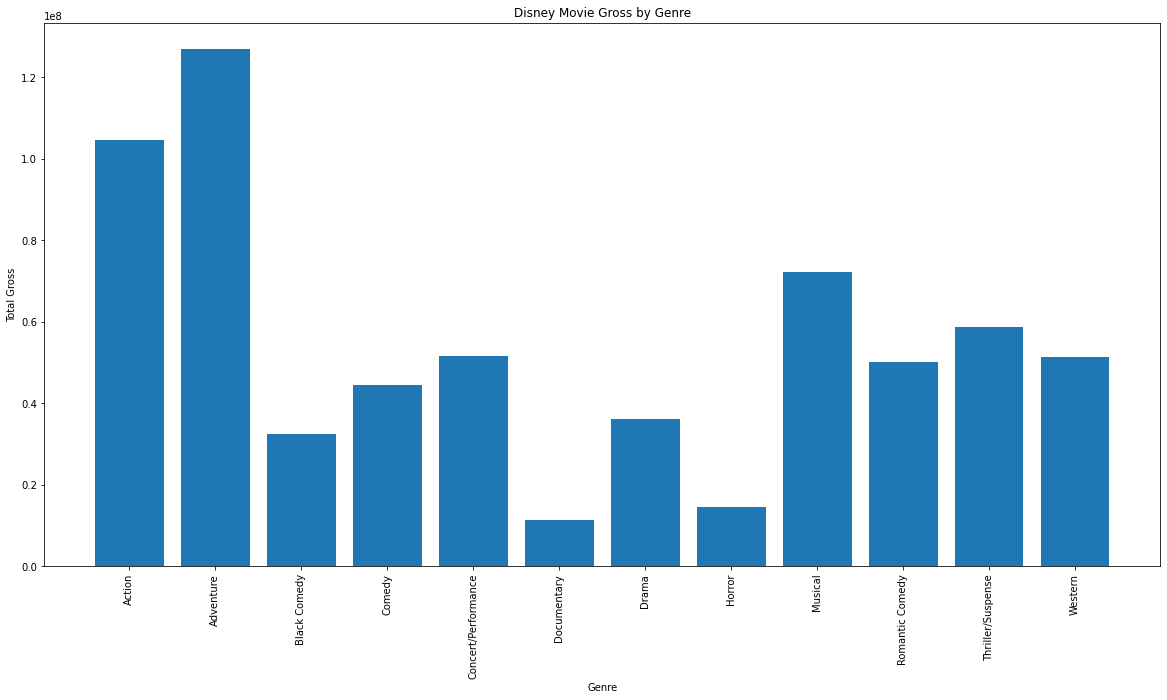

In [89]:
import matplotlib.pyplot as plt

grouped_df = df.groupby("genre")
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
pd.options.display.float_format = '{:20,.2f}'.format

plt.figure(figsize=(20,10))
plt.bar(df['genre'],df['total_gross'])
plt.title('Disney Movie Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.xticks(rotation=90)
plt.show()

### Explain the visualisation
- Based on total gross of all disney movies from 1937 to 2016, the highest gross was with movies of the genre adventure at $190 million.
- Comedy is located in the lower half of total gross revenue by genre

## Question 3. Disney Films Released before 01-01-1986 have a lower gross per film compared to those released during and after this date
### Analyze

- setup the dataframe

In [91]:
df = pd.read_csv("/Users/Judy/Downloads/disney_movies_total_gross.csv")
print(df)

                         movie_title release_date      genre mpaa_rating  \
0    Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                          Pinocchio   1940-02-09  Adventure           G   
2                           Fantasia   1940-11-13    Musical           G   
3                  Song of the South   1946-11-12  Adventure           G   
4                         Cinderella   1950-02-15      Drama           G   
..                               ...          ...        ...         ...   
574         The Light Between Oceans   2016-09-02      Drama       PG-13   
575                   Queen of Katwe   2016-09-23      Drama          PG   
576                   Doctor Strange   2016-11-04  Adventure       PG-13   
577                            Moana   2016-11-23  Adventure          PG   
578     Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross  
0      184925485                5228953251

- Filtered results based on date range of 01/01/1937 - 12/31/1967 for period of influence by Walt Disney

In [109]:
df = pd.read_csv("/Users/Judy/Downloads/disney_movies_total_gross.csv")
df['Dates'] = pd.to_datetime(df['release_date']).dt.date

filtereddate_df = df.loc[(df['release_date'] >= '1937-01-01')
                     & (df['release_date'] < '1968-01-01')]

print(filtereddate_df)

                        movie_title release_date      genre mpaa_rating  \
0   Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                         Pinocchio   1940-02-09  Adventure           G   
2                          Fantasia   1940-11-13    Musical           G   
3                 Song of the South   1946-11-12  Adventure           G   
4                        Cinderella   1950-02-15      Drama           G   
5      20,000 Leagues Under the Sea   1954-12-23  Adventure         NaN   
6                Lady and the Tramp   1955-06-22      Drama           G   
7                   Sleeping Beauty   1959-01-29      Drama         NaN   
8                    101 Dalmatians   1961-01-25     Comedy           G   
9       The Absent Minded Professor   1961-03-16     Comedy         NaN   
10                 Babes in Toyland   1961-12-14    Musical           G   
11                      Bon Voyage!   1962-05-17     Comedy   Not Rated   
12           The Sword in

- Mean of inflation Adjusted Gross Revenue for films from 01/01/1937 - 12/31/1967

In [110]:
filtereddate_df['inflation_adjusted_gross'].mean()

1160006093.2857144

- Filtered results based on date range of 01/01/1968 - 12/31/1985 for period after Disney and before Eisner

In [111]:
df = pd.read_csv("/Users/Judy/Downloads/disney_movies_total_gross.csv")
df['Dates'] = pd.to_datetime(df['release_date']).dt.date

filtereddipdate_df = df.loc[(df['release_date'] >= '1968-01-01')
                     & (df['release_date'] < '1986-01-01')]

print(filtereddipdate_df)

                               movie_title release_date      genre  \
14                      Blackbeard's Ghost   1968-02-08     Comedy   
15                          The Aristocats   1970-04-24    Musical   
16                            The Boatniks   1970-07-01     Comedy   
17                Bedknobs and Broomsticks   1971-10-07    Musical   
18                 The Apple Dumpling Gang   1975-07-01     Comedy   
19                           Freaky Friday   1977-01-21     Comedy   
20  The Many Adventures of Winnie the Pooh   1977-03-11        NaN   
21                            The Rescuers   1977-06-22  Adventure   
22              Herbie Goes to Monte Carlo   1977-06-24        NaN   
23                          The Black Hole   1979-12-21        NaN   
24                        Midnight Madness   1980-02-08        NaN   
25           The Last Flight of Noah’s Ark   1980-06-25        NaN   
26                The Devil and Max Devlin   1981-01-01        NaN   
27                  

- Mean of inflation Adjusted Gross Revenue for films from 01/01/1968 - 12/31/1985

In [112]:
filtereddipdate_df['inflation_adjusted_gross'].mean()

64170917.29032258

- Filtered results based on date range of 01/01/1986 - 12/31/2021 for period during and after Eisner

In [104]:
df = pd.read_csv("/Users/Judy/Downloads/disney_movies_total_gross.csv")
df['Dates'] = pd.to_datetime(df['release_date']).dt.date

filteredinvdate_df = df.loc[(df['release_date'] >= '1986-01-01')
                     & (df['release_date'] < '2021-01-01')]

print(filteredinvdate_df)

                       movie_title release_date      genre mpaa_rating  \
45   Down and Out in Beverly Hills   1986-01-31     Comedy           R   
46                        Off Beat   1986-04-11     Comedy         NaN   
47                 Ruthless People   1986-06-27     Comedy           R   
48       The Great Mouse Detective   1986-07-02  Adventure         NaN   
49         Flight of the Navigator   1986-07-30  Adventure         NaN   
..                             ...          ...        ...         ...   
574       The Light Between Oceans   2016-09-02      Drama       PG-13   
575                 Queen of Katwe   2016-09-23      Drama          PG   
576                 Doctor Strange   2016-11-04  Adventure       PG-13   
577                          Moana   2016-11-23  Adventure          PG   
578   Rogue One: A Star Wars Story   2016-12-16  Adventure       PG-13   

     total_gross  inflation_adjusted_gross       Dates  
45      62134225                 141183693  1986-01-31

- Mean of inflation Adjusted Gross Revenue for films from 01/01/1986 - 12/31/2021

In [105]:
filteredinvdate_df['inflation_adjusted_gross'].mean()

94633178.38014981

## Evaluation

- Findings
    - Question 1
        - Hypothesis is true
        - G rating resulted in gross revenue adjusted for inflation of 291,260,995
        - G rating gross revenue is higher than the other MPAA ratings
    - Question 2
        - Hypothesis is false
        - Greatest gross is for adventure at 127,047,050
        - Comedy gross is at 44,613,295
    - Question 3
        - Hypothesis is false
        - Before 01/01/1968 inflation adjusted gross is highest at 1,160,006,093
        - From 01/01/1968 - 12/31/1986 is 64,170,917 and after 01/01/1986 is 94,633,178